# Challenge Objective

 - The goal of the Challenge is to **identify the presence, absence, or unclear cases of murmurs in heart sound recordings** collected from **multiple auscultation locations** on the body

 # Challenge Data_ver 1.0.3

In [1]:
import pandas as pd
from glob import glob

In [96]:
training_data_csv = pd.read_csv('./physionet.org/files/circor-heart-sound/1.0.3/training_data.csv')

In [97]:
training_data_csv['Patient ID'] = training_data_csv['Patient ID'].astype(str)

In [98]:
training_data_csv['Patient ID'] = training_data_csv['Patient ID'].str.zfill(5)

In [99]:
training_data_csv

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,02530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,09979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,09983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


 Total 1,568 patients data. **Training Data is 942 patients**. The rest of data ( 626 ) is evaluation/test data set. It will be provided later. 

In [6]:
patient_files = glob('/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/*.txt')

In [7]:
len(patient_files)

942

Each patient may have one or more recording. **The number of recordings is 3,163**

In [8]:
all_wav = glob('/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/*.wav')

In [9]:
len(all_wav)

3163

In [199]:
len(find_patient_wav_files(data_folder))

3163

The total number of variables is **22**.

In [103]:
training_data_csv.columns

Index(['Patient ID', 'Locations', 'Age', 'Sex', 'Height', 'Weight',
       'Pregnancy status', 'Murmur', 'Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Campaign', 'Additional ID'],
      dtype='object')

In [10]:
training_data_csv.columns

Index(['Patient ID', 'Recording locations:', 'Age', 'Sex', 'Height', 'Weight',
       'Pregnancy status', 'Murmur', 'Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Outcome', 'Campaign', 'Additional ID'],
      dtype='object')

Representatively, I'll explain a few variations.  **The detailed description is in this [link](https://moody-challenge.physionet.org/2022/data/).**

 - Murmur :  Three types. **Present, Absent, Unknown**

<IPython.core.display.Javascript object>


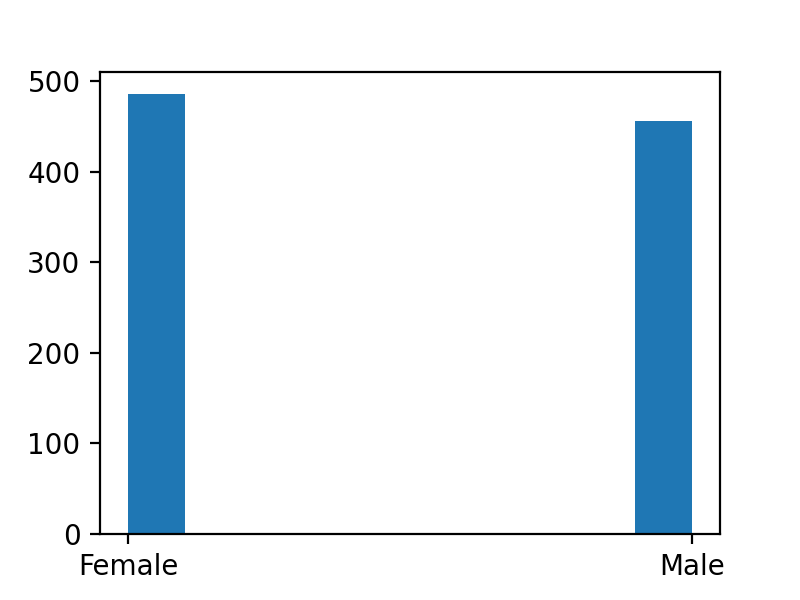

(array([486.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 456.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv.Sex)

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv.Recording locations:)

SyntaxError: invalid syntax (1361181378.py, line 4)

<IPython.core.display.Javascript object>


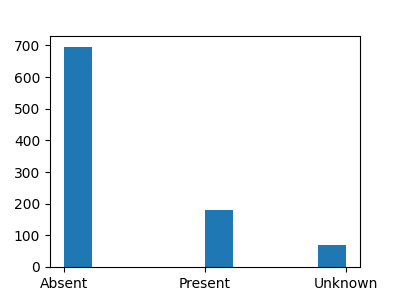

(array([695.,   0.,   0.,   0.,   0., 179.,   0.,   0.,   0.,  68.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

In [133]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv.Murmur)

<IPython.core.display.Javascript object>


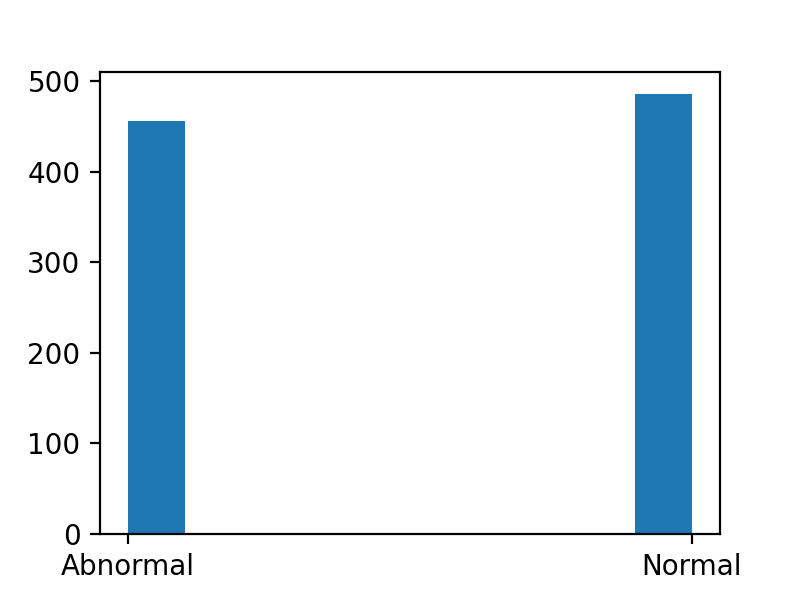

(array([456.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 486.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv.Outcome)

### outcome 에 따른 column 분포

<IPython.core.display.Javascript object>


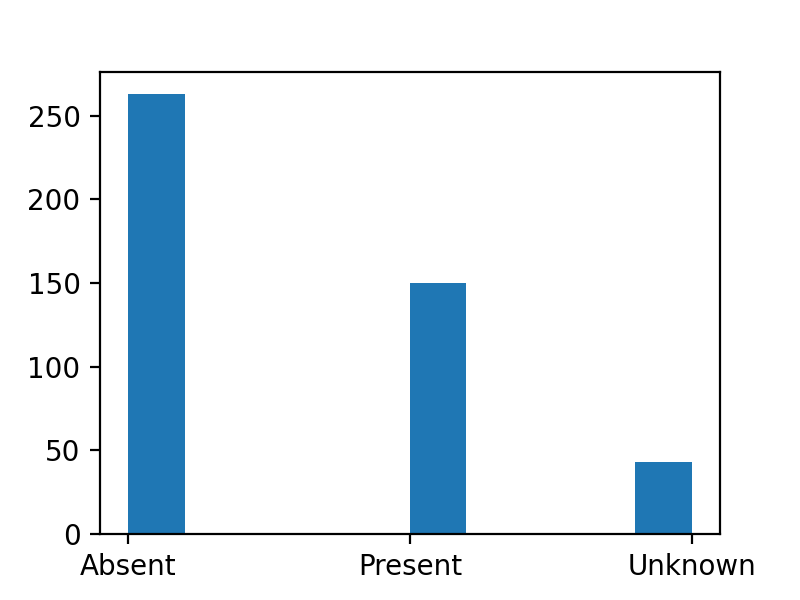

(array([263.,   0.,   0.,   0.,   0., 150.,   0.,   0.,   0.,  43.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

In [84]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv[training_data_csv['Outcome']== 'Abnormal'].Murmur)

<IPython.core.display.Javascript object>


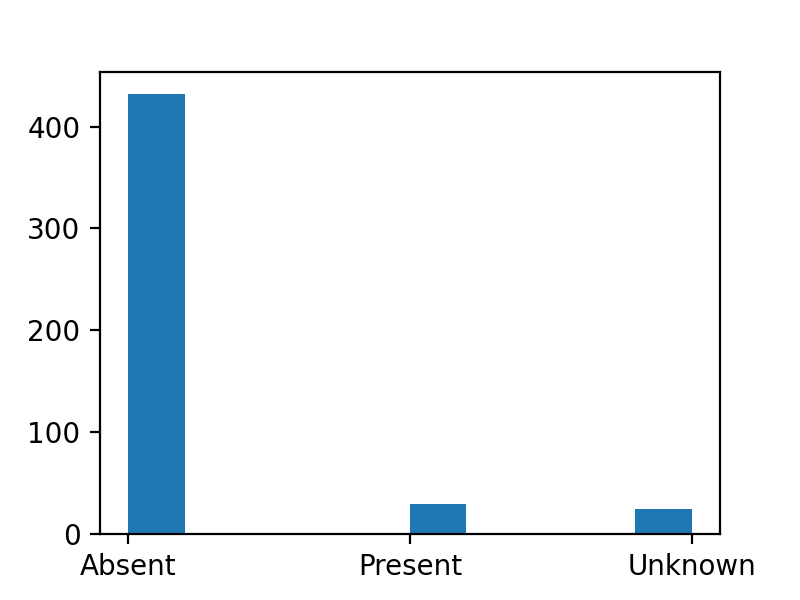

(array([432.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,  25.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

In [85]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(training_data_csv[training_data_csv['Outcome']== 'Normal'].Murmur)

In [90]:
training_data_csv[training_data_csv['Outcome']== 'Normal'].iloc[:,9].value_counts()

TV    11
MV     9
PV     9
Name: Most audible location, dtype: int64

In [91]:
training_data_csv[training_data_csv['Outcome']== 'Abnormal'].iloc[:,9].value_counts()

PV    53
TV    45
MV    33
AV    19
Name: Most audible location, dtype: int64

In [83]:
training_data_csv.Murmur.value_counts()

Absent     695
Present    179
Unknown     68
Name: Murmur, dtype: int64

In [15]:
training_data_csv.Outcome.value_counts()

Normal      486
Abnormal    456
Name: Outcome, dtype: int64

  - Murmur Locations : The auscultation location(s) where at least one murmur wave has been observed. There are five locations. 
   - PV: pulmonary valve 
   - TV: tricuspid valve
   - AV: aortic valve
   - MV: mitral valve
   - Phc: any other location  

cf) **there are two normal heart sounds**, often described as a lub and a dub that occur in sequence with each heartbeat.  
  **These are the first heart sound (S1) and second heart sound (S2)**
  - The first heart sound(S1),forms the "lub" of "lub-dub" and is composed of components MV (mitral valve closure) and TV (tricuspid valve closure).
  - The second heart sound(S2), forms the "dub" of "lub-dub" and is composed of components AV (aortic valve closure) and PV (pulmonary valve closure). 

In [11]:
training_data_csv.iloc[:,8].value_counts()

AV+MV+PV+TV        70
AV+MV              19
MV+PV+TV           17
MV                 16
TV                 10
MV+TV               9
PV+TV               8
AV+PV               6
PV                  6
AV+PV+TV            6
MV+PV               4
AV+MV+PV            2
AV                  2
AV+MV+PV+Phc+TV     1
AV+MV+TV            1
MV+Phc+TV           1
AV+TV               1
Name: Murmur locations, dtype: int64

In [14]:
training_data_csv.iloc[:,9].value_counts()

PV    62
TV    56
MV    42
AV    19
Name: Most audible location, dtype: int64

In [20]:
training_data_csv.Sex.value_counts()

Female    486
Male      456
Name: Sex, dtype: int64

In [19]:
training_data_csv.Age.value_counts()

Child         664
Infant        126
Adolescent     72
Neonate         6
Name: Age, dtype: int64

In [17]:
dist_dic = dict(training_data_csv.iloc[:,9].value_counts())
print(dist_dic)
s = list()
for i in dist_dic.keys() :
    s.append(dist_dic[i])
print(sum(s))

{'PV': 62, 'TV': 56, 'MV': 42, 'AV': 19}
179


 - Most audible loaction : The auscultation location where **murmur waves were most audible**, there are five locations. PV,TV,AV,MV,Phc

<IPython.core.display.Javascript object>


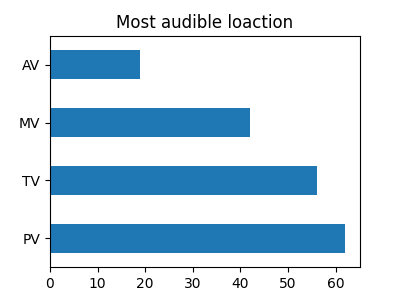

<AxesSubplot:title={'center':'Most audible loaction'}>

In [198]:
plt.figure(figsize=(4,3))
training_data_csv.iloc[:,9].value_counts().plot(kind='barh', title = 'Most audible loaction')

In [101]:
training_data_csv.iloc[:,9].value_counts()

PV    62
TV    56
MV    42
AV    19
Name: Most audible location, dtype: int64

  - Systolic / Diastolic murmur grading : describes the murmur’s intensity grade feature in the systolic/the diastolic period according to the Levine scale. there are three type.  
    
    
    - Systolic murmur grading  
      Grade I/VI : if barely audible and not heard/present or not recorded in all auscultation locations.  
      Grade II/VI : if soft, but easily heard in all auscultation locations.  
      Grade III/VI : if moderately loud or loud  
    
    
    - Diastolic murmur grading  
      Grade I/IV: if barely audible and not heard/present or not recorded in all auscultation locations  
      Grade II/IV: if soft, but easily heard in all auscultation locations  
      Grade III/IV: if moderately loud or loud  

In [104]:
training_data_csv.iloc[:,12].value_counts()

I/VI      104
III/VI     46
II/VI      28
Name: Systolic murmur grading, dtype: int64

In [105]:
training_data_csv.iloc[:,17].value_counts()

I/IV      3
III/IV    1
II/IV     1
Name: Diastolic murmur grading, dtype: int64

 - Murmur Shape  
  ![Murmur Shape](https://github.com/JUNGGUKLEE/jklee/blob/main/%E1%84%89%E1%85%B5%E1%86%B7%E1%84%87%E1%85%A1%E1%86%A8%E1%84%83%E1%85%A9%E1%86%BC.png?raw=true)
 

In [82]:
training_data_csv.describe(include=np.object).T

,count,unique,top,freq
Locations,942,28,AV+PV+TV+MV,586
Age,868,5,Child,598
Sex,942,2,Female,486
Murmur,942,3,Absent,695
Murmur locations,179,17,AV+MV+PV+TV,70
Most audible location,179,4,PV,62
Systolic murmur timing,178,4,Holosystolic,101
Systolic murmur shape,178,4,Plateau,111
Systolic murmur grading,178,3,I/VI,104
Systolic murmur pitch,178,3,Low,87


In [79]:
training_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Locations                 942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

In [23]:
training_data_csv.Murmur.value_counts()

Absent     695
Present    179
Unknown     68
Name: Murmur, dtype: int64

In [21]:
training_data_csv.iloc[:,9].value_counts()

PV    62
TV    56
MV    42
AV    19
Name: Most audible location, dtype: int64

In [22]:
training_data_csv.Outcome.value_counts()

Normal      486
Abnormal    456
Name: Outcome, dtype: int64

# Data Split_Murmur_ver

In [60]:
absent_id = list(training_data_csv[training_data_csv['Murmur']== 'Absent'].loc[:,'Patient ID'])
unknown_id = list(training_data_csv[training_data_csv['Murmur']== 'Unknown'].loc[:,'Patient ID'])

In [61]:
# murmur = present 
pv_id = list(training_data_csv[training_data_csv.iloc[:,9]== 'PV'].loc[:,'Patient ID'])
tv_id = list(training_data_csv[training_data_csv.iloc[:,9]== 'TV'].loc[:,'Patient ID'])
mv_id = list(training_data_csv[training_data_csv.iloc[:,9]== 'MV'].loc[:,'Patient ID'])
av_id = list(training_data_csv[training_data_csv.iloc[:,9]== 'AV'].loc[:,'Patient ID'])

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
absent_train, absent_test, _, _ = train_test_split(absent_id, absent_id, test_size=0.2, random_state=777)#, stratify=y_data) 
unknown_train, unknown_test, _, _ = train_test_split(unknown_id, unknown_id, test_size=0.2, random_state=666)#, stratify=y_data) 

In [64]:
pv_train, pv_test, _, _ = train_test_split(pv_id, pv_id, test_size=0.2, random_state=666)#, stratify=y_data) 
tv_train, tv_test, _, _ = train_test_split(tv_id, tv_id, test_size=0.2, random_state=666)#, stratify=y_data)
mv_train, mv_test, _, _ = train_test_split(mv_id, mv_id, test_size=0.2, random_state=666)#, stratify=y_data)
av_train, av_test, _, _ = train_test_split(av_id, av_id, test_size=0.2, random_state=666)#, stratify=y_data)

In [68]:
print(len(absent_train)+len(unknown_train)+len(pv_train)+len(tv_train)+len(mv_train)+len(av_train))
print(len(absent_test)+len(unknown_test)+len(pv_test)+len(tv_test)+len(mv_test)+len(av_test))

751
191


In [70]:
all_train = list()
all_test = list()

all_train.extend(absent_train)
all_train.extend(unknown_train)
all_train.extend(pv_train)
all_train.extend(tv_train)
all_train.extend(mv_train)
all_train.extend(av_train)

all_test.extend(absent_test)
all_test.extend(unknown_test)
all_test.extend(pv_test)
all_test.extend(tv_test)
all_test.extend(mv_test)
all_test.extend(av_test)

In [73]:
print(len(set(all_train)))
print(len(set(all_test)))

751
191


In [80]:
all_file = glob('/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/*.*')
print(len(all_file))

10432


In [94]:
fnm_id = list()
for i in all_file:
    ids = i.split('/')[-1][:5]
    fnm_id.append(ids)
print(len(fnm_id))
print(len(set(fnm_id)))

10432
946


In [112]:
unk_id = list()
for i in all_file:
    ids = i.split('/')[-1][:5]
    if ids == 'index':
        unk_id.append(i)
print(len(unk_id))
print(len(set(unk_id)))
print(unk_id)

1
1
['/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/index.html']


## txt 파일이 없고, training_data.csv 에 없는 id가 4개 있다.

In [103]:
csv_id = list(training_data_csv.iloc[:,0])
print(len(csv_id))

942


In [108]:
csv_id

['02530',
 '09979',
 '09983',
 '13918',
 '14241',
 '14998',
 '23625',
 '24160',
 '29045',
 '29378',
 '31737',
 '33151',
 '36327',
 '38337',
 '39043',
 '39403',
 '39456',
 '40058',
 '40798',
 '40840',
 '43852',
 '44514',
 '45843',
 '46065',
 '46532',
 '46579',
 '46778',
 '47002',
 '49558',
 '49561',
 '49562',
 '49568',
 '49572',
 '49574',
 '49577',
 '49585',
 '49595',
 '49598',
 '49607',
 '49610',
 '49618',
 '49622',
 '49627',
 '49628',
 '49630',
 '49631',
 '49638',
 '49641',
 '49653',
 '49659',
 '49661',
 '49669',
 '49678',
 '49683',
 '49687',
 '49691',
 '49704',
 '49712',
 '49719',
 '49729',
 '49735',
 '49745',
 '49748',
 '49751',
 '49754',
 '49761',
 '49776',
 '49808',
 '49821',
 '49823',
 '49824',
 '49829',
 '49832',
 '49838',
 '49839',
 '49842',
 '49850',
 '49853',
 '49854',
 '49873',
 '49876',
 '49896',
 '49897',
 '49900',
 '49930',
 '49931',
 '49946',
 '49952',
 '49959',
 '49960',
 '49963',
 '49966',
 '49968',
 '49969',
 '49970',
 '49974',
 '49978',
 '49979',
 '49980',
 '49983',


In [106]:
not_in_csv = list()
for i in fnm_id :
    if i not in csv_id:
        not_in_csv.append(i)
print(len(not_in_csv))
print(not_in_csv)

40
['9979_', '9983_', '9979_', '2530_', '9983_', '9983.', '9979_', '2530_', '9983_', '2530_', '2530_', '2530_', '9983_', '9979_', '2530.', '2530_', '9983_', '9979_', '9979_', '2530_', '9983_', '2530_', '9983_', '2530_', '9979_', '9983_', '9979_', '9979.', '9979_', 'index', '2530_', '2530_', '9983_', '9979_', '9983_', '2530_', '9983_', '9983_', '9979_', '9979_']


## 그냥 0으로 시작하는 id가 0이 생략된거였음

In [92]:
all_file

['/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50829_AV.wav',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50319_MV.hea',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69147_AV.wav',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50153_AV.hea',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85253_MV.hea',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85042_PV.wav',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68407.txt',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85103_TV.hea',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213_MV.hea',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50641_PV.wav',
 '/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_

In [113]:
import shutil
import time
for file in all_file :
    for ids in all_train :
        if ids[0] == '0' :
            ids = ids[1:]
        if file.split('/')[-1].startswith(ids) :
            print(file)
            
            shutil.copyfile(file, '/Data1/physionet/data_split/murmur/train/'+ file.split('/')[-1])
          
            

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50829_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50319_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50153_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85253_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85042_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68407.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85103_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50029_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85147_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84877_MV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50668_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68755_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68849.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84780_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85175_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49610_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49963_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85296_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50325_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84987.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84949_PV.hea
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85153_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50314_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85235_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84809.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50111_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49630_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68444_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85080_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50795_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68260_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50239_TV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69152_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50319_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69152_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85023_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49823.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85210_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50117.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85023_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68419_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84987_PV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49960_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85230_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85161_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84762_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/45843_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69159_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50721_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85340_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69188_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50306_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50027_AV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84987_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50384_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85203_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85034_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69159_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68175_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68298_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49931_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50077_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50007_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68456_MV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50277_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50321_MV_1.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49854_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68219_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50620_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85122_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68194_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50687_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85150_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84868_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49876_AV.wav
/Data1/physionet/ph

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50803_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85308_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50113_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85299_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85062_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84721_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50161_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68407_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84994_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85241_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49631_MV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84753_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50053_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50645_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85105_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85066_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50802_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85175_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50752_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68269_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68318_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50250_MV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68431_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50677_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50250_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50244_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/76240_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85334_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68222_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/39403_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/75440_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49638_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85131_AV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85038_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69161_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85222_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85077_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49754.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84859_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50099_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50657_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85246_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84882_TV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68886_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84695_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84761_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85240_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/78592.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84687_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50334_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50731_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50756_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/81501_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50337_PV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68711_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50015_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50668_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/61610_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84866_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/2530_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49897.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68740_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68444_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50326_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68379_TV.hea
/Data1/physionet/physione

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84854_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84834.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84894_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85313_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50280_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50096.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84866_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50620_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85213_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85135_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49931.txt
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85139_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85087_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50296_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49595_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84966_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49687_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84936_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84994_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84912_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84946_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85053_PV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50657_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85063.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50122_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84718.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69079_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50225_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/55945_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84807_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84837.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50690_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50314_TV.hea
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68711.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85234_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50359_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85044_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50061_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85020_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85093_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85250.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50669_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49988_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49669.txt
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50133_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84994_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50318_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50782_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84751_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50125_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85154_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85241_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50731_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68359_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/39456_MV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50385_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68292_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85199_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49946_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85217_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85210_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50319.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50725_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84753_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85337_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84775_PV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85217_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49630_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50278_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50137_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50023_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84885_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68498.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85143_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68886_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68395_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84886_PV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49839_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49988_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68427_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/39403_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85207_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68660_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50207_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50796_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50151_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50669.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49562_TV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85246_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50720_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84727_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85075_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50713_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50790.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68908_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68886_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85033_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69129_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50122_PV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50332_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84863_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85119_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49988.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50721_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50784_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85265.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50118_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50113_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49995_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84785_TV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85332_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84861_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85230_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50691_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50150_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84921_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84799_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50254.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50239_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84837_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50339_MV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85066_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85116_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85323_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68425_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84866_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50276.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85259.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85147_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84878_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85161_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/80348.txt
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68427_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85337_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50325_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84736_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50820_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84950_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/80348_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85349.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85244_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/2530_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85243_AV.tsv
/Data1/physionet/physione

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50284_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85244_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68901_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68659_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50014_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50238_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50657_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49995_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50311_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50332_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68292_PV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50350_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68827_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85327_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84805_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50231_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50349_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84861_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/29045_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50264.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85207_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84808_AV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50017_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50007_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50056_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68504.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50054_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50043_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50758_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49719_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68377.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84730_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50263_AV.hea
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85270_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84796.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68888_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85131_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50721.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/45843.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50276_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85203.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/14998_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85198_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84724_PV.wav
/Data1/physionet/physionet.org/fi

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49561.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49969.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68659_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50321_MV_1.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68504_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68368_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85102_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85180_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/40058_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50244_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50014_MV.tsv
/Data1/physionet/physione

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84885_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/51331_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50096_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50354_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50254_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85080.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49678_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84831_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84876_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68660_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50654_PV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/78592_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50790_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84689_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50665_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/9983_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50225_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84957_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/36327_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50296.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85157_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84713_AV.wav
/Data1/physionet/physione

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85087_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50231_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84785_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69067_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85239_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84706_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68702_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85207_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85109_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85197_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68888_MV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50121_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50727_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68504_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50113_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68504_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84969_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85328_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85192_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85105_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85029_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85002_AV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50676_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50231_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50217_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85315_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85336_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49842.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50027_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50149_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68901_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50204_MV_1.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84764_PV.hea
/Data1/physionet/physi

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84730_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85341_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50271_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50657_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49876_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85246_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85235_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85019_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85299_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85046_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84775_TV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85323_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84808_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84837_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84936_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50645_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50244_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50678_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84738_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68504_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49946_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84804_MV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50138_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50017_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50027_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/51331_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85011_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50161.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68444.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84837_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50306_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68477_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50111_MV.tsv
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50829_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84934_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84946_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68431_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84750_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50304_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68456_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50166_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68576_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84851_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50076_AV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68708_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85336_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50209_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50736.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85176.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85174_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50763_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84693_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50078.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85332_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85033_TV.hea
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69093_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68478_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68182_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50306_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/81297_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84863_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85186_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84725_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50802_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85176_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84699_AV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84851_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50152_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50254_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50256_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84966_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68874_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84962_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50311_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50654_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68632_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85010.txt
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85312.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50635_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/63581_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85335_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85029_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85313_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85046_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84960_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84977_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84693_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68632_TV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84942_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50078_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84716_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49839.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49678_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50239_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50829_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85163_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84853_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84854_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85172_AV.hea
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68318_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68861_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/78592_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50680_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50647_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68482_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50230_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50819_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68427_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/64715_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49930_PV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49754_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84750_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49745_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/64715_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49568_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68849_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50744_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85175.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85110_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50297_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50089_PV.tsv
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69161.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50291_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50238_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85000_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85110_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50115_TV_1.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84702_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68857_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85328_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68260_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49931_AV.wav
/Data1/physionet/physi

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68337_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50325_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85229.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85154_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84935_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68901_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69106_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68556.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50359_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84775_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50669_AV.tsv
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50388_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50174_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84738_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84710.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84803_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84890_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85119_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50109_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50278_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68478_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84863_MV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50115_TV_1.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84786_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/2530_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85277_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85207_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85031_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84793_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/78592_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50391_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84976_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50715_PV.wav
/Data1/physionet/phy

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85336_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/31737_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85110_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85252_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49729_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85300.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49974_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68316.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84839_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49630_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68379_TV.tsv
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50217_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68560_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85196_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50742_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50325_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68316_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50359_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/39456_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85163_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85328_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85028_MV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50771_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85258_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85169.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85026_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50802_TV_2.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49577_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85163_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85227_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85230_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49630_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50652_AV.wav
/Data1/physionet/physi

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50141_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68705_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68292_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50100_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69066_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69079_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84776_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68412_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69093_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50174_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69152_PV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84957_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84823_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84947_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50142.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50812_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84985_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84778.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/74420_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68219_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50349.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68374_AV.hea
/Data1/physionet/physionet.org

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68874_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69095_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50126_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84839_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50339_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85234_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50121_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68864_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84805_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84881_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85241.txt
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84992_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50254_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84742_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/55945_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49661.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/63456.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85042_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50715_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/61610_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50723_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85135_TV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49751_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49659_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50280_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50217_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85234_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68279_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68395_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69066_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49562_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50331_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84851_MV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50136_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85265_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50023_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49561_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85214_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69141_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84696_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69093_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50258_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68213_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84706_MV.wav
/Data1/physionet/phys

In [114]:
import shutil
for file in all_file :
    for ids in all_test :
        if ids[0] == '0' :
            ids = ids[1:]
        if file.split('/')[-1].startswith(ids) :
            print(file)
            
            shutil.copyfile(file, '/Data1/physionet/data_split/murmur/test/'+ file.split('/')[-1])
          

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69147_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50641_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/81035.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69125_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50168_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68698_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/40798_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50693_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50006_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85144_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50375_MV.tsv
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84734_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50249_AV_2.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/40798_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50693_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50219_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85216_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85225_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68887_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50386_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50743_AV_1.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68796_MV.wav
/Data1/physionet/

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68484_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84952_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84986_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69144_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68306_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85162_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50737_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68484_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50143_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84974_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84826.txt
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68698_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85279_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85162_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84708_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84990_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84893_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50006_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85118_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49832_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50631_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68952_PV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84993.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/40798_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49691_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85306_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50086_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84917_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49691_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49653_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50770_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68545_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/61117_AV.tsv
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50641_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84758_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50214_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85084_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68436_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/74417_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50643_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50644_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84711_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84952_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50275_PV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50770.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85108_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84852_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85184_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84920_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68432_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/33151_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68327_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85043_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84760.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50781_AV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84852_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50375_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69068_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85121_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68460_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84982_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84857_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50289_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85162_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49683_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50104_TV.tsv
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50685.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50165_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85288_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50289_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50026_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84978_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85166_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85225_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50641_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84822_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49653_AV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/73497_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69125_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84952_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50737_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50210_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85128_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84993_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84829_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85282_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50386_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85242_MV.hea
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50734_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68738_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85108_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50105.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84840_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85305_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68330.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84840_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69125_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50086_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85181_AV.wav
/Data1/physionet/physionet.

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84840_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68327_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84978_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50348_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85069_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50656_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84961_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69147_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85279_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84931_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85219_MV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50774_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50214_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49829_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85069.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50348_AV_1.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49761_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84711_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50743_AV_1.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49980_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85167.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84993_AV.wav
/Data1/physionet/physio

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68952_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/40798_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84893_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50086.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85118_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85329_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/74417_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69068_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68887_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84917_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84711_PV.tsv
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69068_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68404_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84865_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85219_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68738_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50693_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69068_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69147_MV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85132_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50685_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84974_TV.wav
/Data1/physionet/phys

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50165.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84856_PV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84813_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84978_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68404_MV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68423_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/50165_PV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68327_TV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/68330_TV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85140_PV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/49683_PV.wav
/Data1/physionet/physion

/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85282.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84893_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84813_TV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85181_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84708.txt
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/73497_AV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85288_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/85069_MV.wav
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/73497_AV.tsv
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/69125_AV.hea
/Data1/physionet/physionet.org/files/circor-heart-sound/1.0.3/training_data/84896_PV.hea
/Data1/physionet/physionet.

In [115]:
path_train = glob('/Data1/physionet/data_split/murmur/train/*.*')
print(len(path_train))
path_test = glob('/Data1/physionet/data_split/murmur/test/*.*')
print(len(path_test))
print(len(path_train)+len(path_test))

8347
2084
10431


# Data Split_Murmur_ver

In [60]:
absent_id = list(training_data_csv[training_data_csv['Murmur']== 'Absent'].loc[:,'Patient ID'])
unknown_id = list(training_data_csv[training_data_csv['Murmur']== 'Unknown'].loc[:,'Patient ID'])

In [ ]:
# Data Split_Murmur_ver

absent_id = list(training_data_csv[training_data_csv['Murmur']== 'Absent'].loc[:,'Patient ID'])
unknown_id = list(training_data_csv[training_data_csv['Murmur']== 'Unknown'].loc[:,'Patient ID'])